# Check Duplicate Files

## Check Celeba Dataset

In [1]:
import os
from PIL import Image, ImageStat
from tqdm import tqdm
import json
import hashlib

image_folder = os.path.join('../data/celeba/', 'img_align_celeba') #img_align_celeba check_dup
image_files = [_ for _ in os.listdir(image_folder) if _.endswith('jpg')]
duplicate_files = {}
checked_hash = {}
hash_dict = {}

def get_image_hash(file_path):
    global hash_dict
    if not file_path in hash_dict.keys():
        img_path = os.path.join(image_folder, file_path)
        hashstr = hashlib.sha1(open(img_path, 'rb').read()).hexdigest()
        hash_dict[file_path] = hashstr
    else:
        hashstr = hash_dict[file_path]
    return hashstr

for i, file_check in enumerate(tqdm(image_files)): 
    chk_hash = get_image_hash(file_check)
    
    if chk_hash in checked_hash.keys():
        dup_file = checked_hash[chk_hash]
        if dup_file in duplicate_files.keys():
            duplicate_files[dup_file].extend([file_check])
        else:
            duplicate_files[dup_file] = [file_check]
    else:
        checked_hash[chk_hash] = file_check
        

#print(checked_hash)
print(duplicate_files)


100%|████████████████████████████████████████████████████████████████████████| 202599/202599 [02:26<00:00, 1379.64it/s]

{'012589.jpg': ['014364.jpg'], '007227.jpg': ['019471.jpg'], '019673.jpg': ['021423.jpg'], '011318.jpg': ['049003.jpg'], '030146.jpg': ['055807.jpg'], '015484.jpg': ['056985.jpg'], '043513.jpg': ['057990.jpg'], '020782.jpg': ['058721.jpg'], '047447.jpg': ['065708.jpg'], '002538.jpg': ['066034.jpg'], '029535.jpg': ['069351.jpg'], '030206.jpg': ['069531.jpg'], '057127.jpg': ['070147.jpg'], '012069.jpg': ['072850.jpg'], '072611.jpg': ['073219.jpg'], '051286.jpg': ['074402.jpg'], '069407.jpg': ['074740.jpg'], '001853.jpg': ['078159.jpg'], '033991.jpg': ['079927.jpg', '147038.jpg'], '052475.jpg': ['081870.jpg'], '019207.jpg': ['082056.jpg'], '067217.jpg': ['083407.jpg'], '052717.jpg': ['085661.jpg'], '034497.jpg': ['088027.jpg'], '048395.jpg': ['093450.jpg'], '024136.jpg': ['093646.jpg'], '062655.jpg': ['098486.jpg'], '071620.jpg': ['100022.jpg'], '035526.jpg': ['102586.jpg'], '037786.jpg': ['103303.jpg'], '060266.jpg': ['103867.jpg'], '035960.jpg': ['104726.jpg'], '059713.jpg': ['104798.jp

In [2]:
from pprint import pprint
import collections
duplicate_files = collections.OrderedDict(duplicate_files)
pprint(duplicate_files)

OrderedDict([('012589.jpg', ['014364.jpg']),
             ('007227.jpg', ['019471.jpg']),
             ('019673.jpg', ['021423.jpg']),
             ('011318.jpg', ['049003.jpg']),
             ('030146.jpg', ['055807.jpg']),
             ('015484.jpg', ['056985.jpg']),
             ('043513.jpg', ['057990.jpg']),
             ('020782.jpg', ['058721.jpg']),
             ('047447.jpg', ['065708.jpg']),
             ('002538.jpg', ['066034.jpg']),
             ('029535.jpg', ['069351.jpg']),
             ('030206.jpg', ['069531.jpg']),
             ('057127.jpg', ['070147.jpg']),
             ('012069.jpg', ['072850.jpg']),
             ('072611.jpg', ['073219.jpg']),
             ('051286.jpg', ['074402.jpg']),
             ('069407.jpg', ['074740.jpg']),
             ('001853.jpg', ['078159.jpg']),
             ('033991.jpg', ['079927.jpg', '147038.jpg']),
             ('052475.jpg', ['081870.jpg']),
             ('019207.jpg', ['082056.jpg']),
             ('067217.jpg', ['083407.jpg'

In [3]:
json.dump(duplicate_files, open("duplicated.json",'w'))

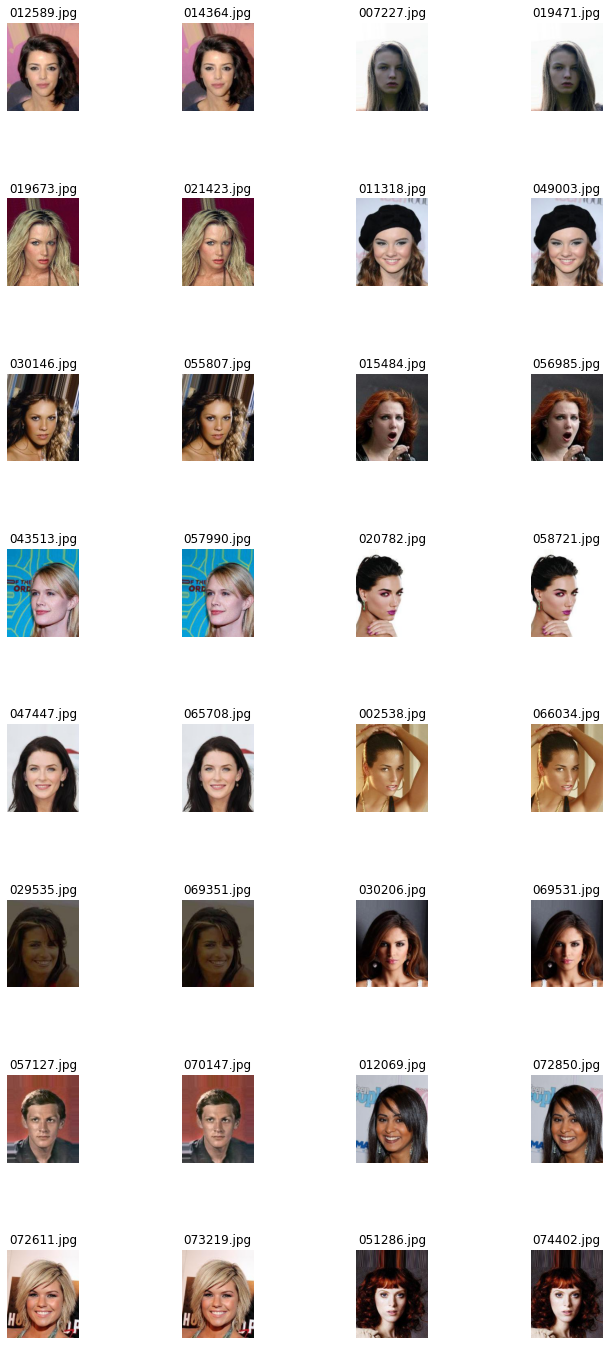

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

%matplotlib inline

for batch in range(0, len(duplicate_files.items())//16):
    duplicate_bat = dict(itertools.islice(duplicate_files.items(), batch*16, batch*16+16))
    #print(duplicate_bat)
    plt.figure(figsize=(10,20))
    ncols = 4
    c = 0
    for i, (first, duplicates) in enumerate(duplicate_bat.items()):
        nrows = len(duplicate_bat)
        
        i_img = os.path.join('../data/celeba/img_align_celeba', first)
        if (i+1)%2==0:
            plt.subplot2grid((nrows,ncols), (i-1,c)) #(nrows, ncols), (row, col) 
            c += 1
        else:
            c = 0
            plt.subplot2grid((nrows,ncols), (i,c))
            c += 1
        
        img = mpimg.imread(i_img)
        plt.imshow(img)
        plt.title(first)
        plt.axis('off')

        for j, mis in enumerate(duplicates):
            m_img = os.path.join('../data/celeba/img_align_celeba', mis)
            img = mpimg.imread(m_img)
            if (i+1)%2==0:
                plt.subplot2grid((nrows,ncols), (i-1,j+c)) #(nrows, ncols), (row, col) 
            else:
                plt.subplot2grid((nrows,ncols), (i,j+c))
            c += 1
            plt.imshow(img)
            plt.title(mis)
            plt.axis('off')
    plt.tight_layout()
#     plt.subplots_adjust(hspace = .001)
    plt.subplots_adjust(wspace=0, hspace=0)
    #plt.subplot_tool()
    plt.show()
    break

## Check Private Testset

In [6]:
import os
from PIL import Image, ImageStat
from tqdm import tqdm
import json
import hashlib
from pprint import pprint

valid_images = [".jpg",".jpeg", ".gif",".png",".tiff"]
image_files = []
image_folder = '../data/testset/'
for dirname in os.listdir(image_folder):
    dirpath = os.path.join(image_folder, dirname)
    if os.path.isdir(dirpath):
        for filename in os.listdir(dirpath):
            ext = os.path.splitext(filename)[1]
            if ext.lower() not in valid_images:
                continue
            image_files.append(os.path.join(dirpath, filename))

duplicate_files = {}
checked_hash = {}
hash_dict = {}

def get_image_hash(file_path):
    global hash_dict
    if not file_path in hash_dict.keys():
        hashstr = hashlib.sha1(open(file_path, 'rb').read()).hexdigest()
        hash_dict[file_path] = hashstr
    else:
        hashstr = hash_dict[file_path]
    return hashstr

for i, file_check in enumerate(tqdm(image_files)): 
    chk_hash = get_image_hash(file_check)
    
    if chk_hash in checked_hash.keys():
        dup_file = checked_hash[chk_hash]
        if dup_file in duplicate_files.keys():
            duplicate_files[dup_file].extend([file_check])
        else:
            duplicate_files[dup_file] = [file_check]
    else:
        checked_hash[chk_hash] = file_check
        

#print(checked_hash)
pprint(duplicate_files)


100%|██████████████████████████████████████████████████████████████████████████| 13233/13233 [00:09<00:00, 1414.03it/s]

{'../data/testset/Bart_Hendricks\\Bart_Hendricks_0001.jpg': ['../data/testset/Ricky_Ray\\Ricky_Ray_0001.jpg'],
 '../data/testset/Carlos_Beltran\\Carlos_Beltran_0001.jpg': ['../data/testset/Raul_Ibanez\\Raul_Ibanez_0001.jpg']}


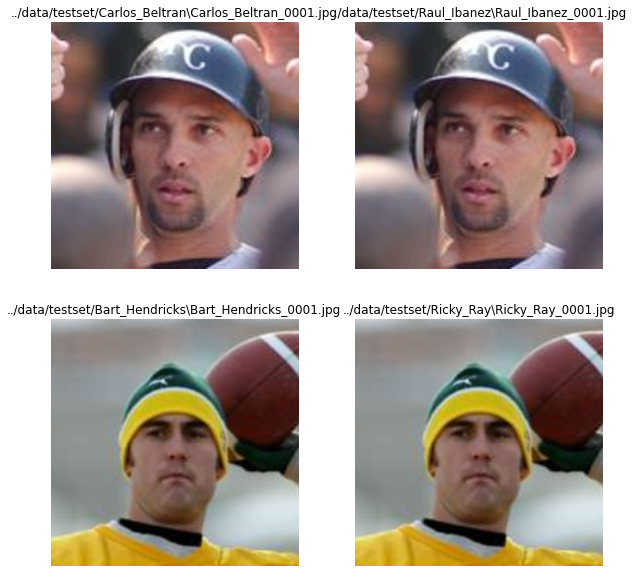

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

%matplotlib inline

plt.figure(figsize=(10,10))
ncols = 2
c = 0
for i, (i_img, duplicates) in enumerate(duplicate_files.items()):
    nrows = len(duplicate_files)
    
    plt.subplot2grid((nrows,ncols), (i,0)) #(nrows, ncols), (row, col) 
    
    img = mpimg.imread(i_img)
    plt.imshow(img)
    plt.title(i_img)
    plt.axis('off')

    for j, mis in enumerate(duplicates):
        m_img = mis
        img = mpimg.imread(m_img)
        plt.subplot2grid((nrows,ncols), (i,j+1)) #(nrows, ncols), (row, col) 
        plt.imshow(img)
        plt.title(mis)
        plt.axis('off')
plt.show()
